<a href="https://colab.research.google.com/github/zbutton314/CS-5560/blob/main/Lab1/code/ICP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# import all the libraries 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import pandas as pd
from nltk import pos_tag
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Next we will mount our google drive on the colab 
run the code below and follow the instructions the G drive will be mounted on drive -> MyDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Readind the files as a pandas dataframe 

In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/data/input_file.txt",delimiter="\t")
dataset

,"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."


converting the data frame to text

In [5]:
text= dataset.to_string()
text

"Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video.]\nIndex: []"

Breaking the text into sentences 

In [6]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

["Empty DataFrame\nColumns: [Text Analytics has lots of applications in today's online world.", 'By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event.', 'Amazon can understand user feedback or review on the specific product.', "BookMyShow can discover people's opinion about the movie.", 'Youtube can also analyze and understand peoples viewpoints on a video.]', 'Index: []']


Breaking the text into words 

In [7]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['Empty', 'DataFrame', 'Columns', ':', '[', 'Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.', ']', 'Index', ':', '[', ']']
75


finding the frequencies distribution

In [8]:
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 56 samples and 75 outcomes>


Finding the two most common words  

In [9]:
fdist.most_common(2)

[('.', 5), ('on', 4)]

Plot of the frequencies distribution

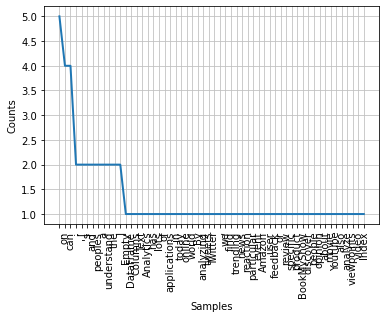

In [10]:
v=fdist.plot(75,cumulative=False)
plt.show()

# **In-Class Programming**

**Customized data prep**

In [24]:
s = dataset.columns[0]
sentences = sent_tokenize(s)
words = word_tokenize(s)

**Task 1: Number of words per sentence.**

Text(0.5, 1.0, 'Sentence Length Frequency')

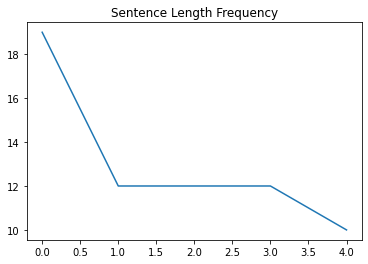

In [67]:
word_list = []
sent_len_list = []
for sent in sentences:
  wt = word_tokenize(sent)
  word_list.append(wt)
  sent_len_list.append(len(wt))

sent_len_list.sort(reverse=True)
plt.plot(sent_len_list)
plt.title('Sentence Length Frequency')

**Task 2: Number of characters per word.**

Text(0.5, 1.0, 'Word Length Frequency')

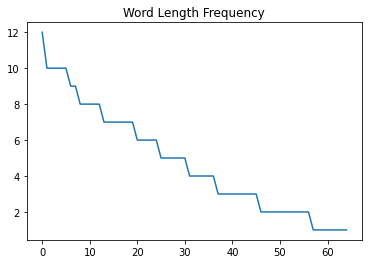

In [66]:
word_len_list = []
for word in words:
  word_len_list.append(len(word))

word_len_list.sort(reverse=True)
plt.plot(word_len_list)
plt.title('Word Length Frequency')

**Task 3: Distribution of parts of speech.**

In [62]:
pos = nltk.pos_tag(words)
pos_df = pd.DataFrame(pos, columns=['word', 'pos'])

pos_df.head()

,word,pos
0,Text,NN
1,Analytics,NNP
2,has,VBZ
3,lots,NNS
4,of,IN


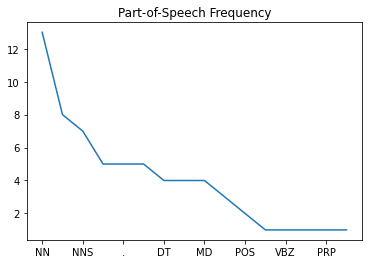

In [64]:
pos_counts_df = pos_df['pos'].value_counts()
pos_counts_df.plot(title='Part-of-Speech Frequency')